# evaluate

> Evaluate our predictions

In [10]:
#| default_exp evaluate

In [11]:
#| export
from pathlib import Path
from sklearn import metrics
import numpy as np
import pandas as pd

In [12]:
data_dir = Path("../data")
assert data_dir.exists()

In [13]:
sample_predictions_path = data_dir / 'sample_predictions.csv'
assert sample_predictions_path.exists()

predictions = pd.read_csv(sample_predictions_path)
predictions.loc[:, 'pred'] = predictions.pred.str.strip()
predictions.loc[:, 'label'] = predictions.label.str.strip()
predictions.head()

,pred,label,idx
0,Order Discrepancy,Billing / Invoice,50493
1,Order Processing,General Inquiry,13780
2,Account/Inquiry,Account/Inquiry,4943
3,Delivery,Account/Inquiry,37088
4,Billing / Invoice,Billing / Invoice,47271


In [14]:
performance_kwargs = {
    'y_true': predictions.label,
    'y_pred': predictions.pred
}

Accuracy

In [15]:
metrics.accuracy_score(
    **performance_kwargs
)

0.67

Classification report

In [16]:
performance_report_str = metrics.classification_report(
    zero_division=np.nan,
    output_dict=False,
    **performance_kwargs)
print(performance_report_str)

                      precision    recall  f1-score   support

     Account/Inquiry       0.89      0.76      0.82        21
   Billing / Invoice       0.33      0.50      0.40         4
             Credits       0.00      0.00       nan         2
            Delivery       0.33      0.33      0.33         3
     General Inquiry       0.33      0.10      0.15        10
   Order Discrepancy       0.46      0.86      0.60         7
    Order Processing       0.89      0.83      0.86        41
             Pricing       0.00       nan       nan         0
     Product Inquiry       0.67      0.40      0.50         5
Program / Promotions       0.00       nan       nan         0
             Returns       0.62      0.71      0.67         7

            accuracy                           0.67       100
           macro avg       0.41      0.50      0.54       100
        weighted avg       0.72      0.67      0.69       100



Confusion Matrix

In [17]:
matrix = metrics.confusion_matrix(
    **performance_kwargs
)
matrix.diagonal()/matrix.sum(axis=1)

/var/folders/cf/vg67tzns4y134rtjmmt9cd000000gp/T/ipykernel_15272/3935502939.py:4: RuntimeWarning: invalid value encountered in divide
  matrix.diagonal()/matrix.sum(axis=1)


array([0.76190476, 0.5       , 0.        , 0.33333333, 0.1       ,
       0.85714286, 0.82926829,        nan, 0.4       ,        nan,
       0.71428571])

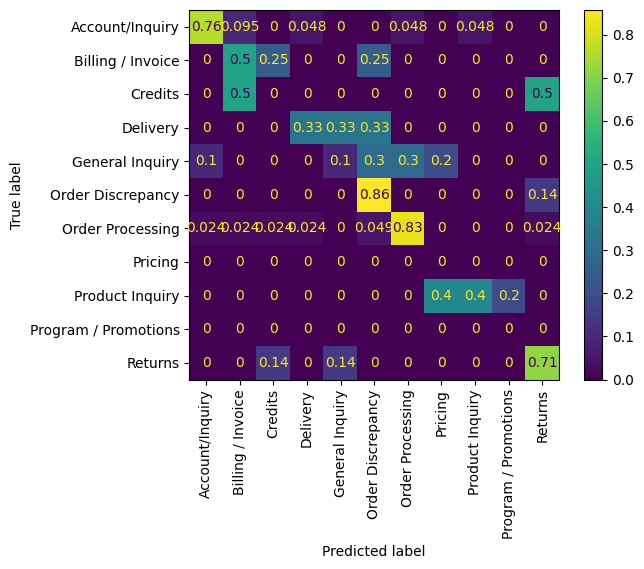

In [18]:
matrix_display = metrics.ConfusionMatrixDisplay.from_predictions(
    normalize='true',
    xticks_rotation='vertical',
    **performance_kwargs
)

In [20]:
#| hide
import nbdev; nbdev.nbdev_export()